# **Tomato Dieases Deep Learning Classification**
	
Credits:https://github.com/codebasics
dataset:https://www.kaggle.com/datasets/arjuntejaswi/plant-village

## Goal of the Project
-Create a deep learning classification for the Tomato Dieases dataset, Using the Tensorflow and Keras python packages.
<br>
-Create a neutral network using convolution and pooling to learn and identify the different diseases in tomatos.

# Outcome
Created and trained a machine learn model to predict tomato diseases with 97.19% accuracy.


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

## Set all of the constants. 
Image size is 256x256, with images put into batches of 32.

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

In [3]:
#Load Dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 9356 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

(256, 256, 3)


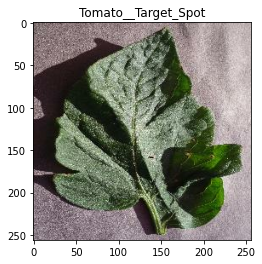

In [5]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    print(image_batch[0].shape)

In [7]:
#Creating train test val split

def train_val_test_split(ds, train_split = 0.8 , val_split = 0.1, test_split =0.1, shuffle = True, shuffle_size = 10000):
    data_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed= 5)#Shuffle the dataset
        
    train_size = int(data_size * train_split)#80% of the data
    val_size = int(data_size * val_split)#10% of data
    test_size = int(data_size * test_split)#10% of data
    
    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(test_size)
    
    return train_data, val_data, test_data
    

In [8]:
#Splits the data into train, val, and test data sets
train_data,val_data,test_data = train_val_test_split(dataset)


In [9]:
#we set the buffer to load the data using CPU and then do the learning on the GPU
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
#Resize the datasets and scale them from 0 to 1
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
#Randomly flip and rotate the dataset, to add more datapoints and images
flip_rotation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [26]:
model = models.Sequential([
    resize_rescale,
    flip_rotation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(7, activation = 'softmax')
])

model.build(input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (32, 125, 125, 128)       36992     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 62, 62, 128)        0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs=30,
)

Epoch 1/30
234/234 [==============================] - 30s 118ms/step - loss: 1.6749 - accuracy: 0.3326 - val_loss: 1.3387 - val_accuracy: 0.4978
Epoch 2/30
234/234 [==============================] - 27s 115ms/step - loss: 1.0301 - accuracy: 0.6284 - val_loss: 0.7908 - val_accuracy: 0.7070
Epoch 3/30
234/234 [==============================] - 27s 115ms/step - loss: 0.7561 - accuracy: 0.7286 - val_loss: 0.6523 - val_accuracy: 0.7731
Epoch 4/30
234/234 [==============================] - 27s 115ms/step - loss: 0.5351 - accuracy: 0.8095 - val_loss: 1.0606 - val_accuracy: 0.7004
Epoch 5/30
234/234 [==============================] - 27s 115ms/step - loss: 0.4505 - accuracy: 0.8373 - val_loss: 0.5457 - val_accuracy: 0.8227
Epoch 6/30
234/234 [==============================] - 27s 115ms/step - loss: 0.3775 - accuracy: 0.8606 - val_loss: 0.7453 - val_accuracy: 0.7764
Epoch 7/30
234/234 [==============================] - 27s 116ms/step - loss: 0.3465 - accuracy: 0.8763 - val_loss: 0.3442 - val_ac

In [30]:
scores = model.evaluate(test_data)

30/30 [==============================] - 2s 48ms/step - loss: 0.0637 - accuracy: 0.9719


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and Validaction Accuracy')

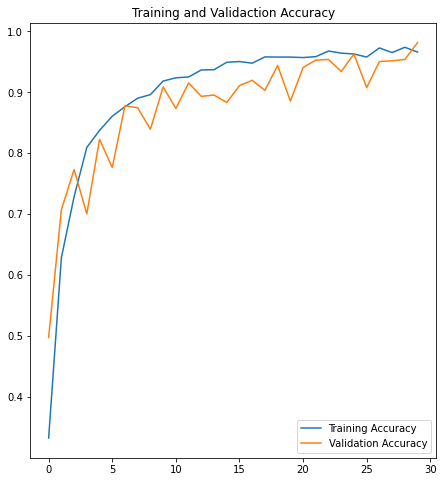

In [39]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.plot(range(30) , history.history['accuracy'] , label="Training Accuracy")
plt.plot(range(30), history.history['val_accuracy'] , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validaction Accuracy")

Text(0.5, 1.0, 'Training and Validaction Loss')

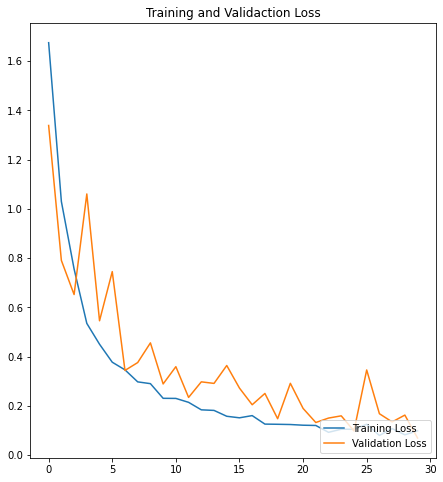

In [33]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.plot(range(30) , history.history['loss'] , label="Training Loss")
plt.plot(range(30), history.history['val_loss'] , label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training and Validaction Loss")

In [64]:
def predict(model, image):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array, 0)
    
    predictions = model.predict(image_array)
    
    pred_class = class_names[np.argmax(predictions)]
    confidence = round(100 * np.max(predictions[0]),2) 
    return pred_class, confidence
    

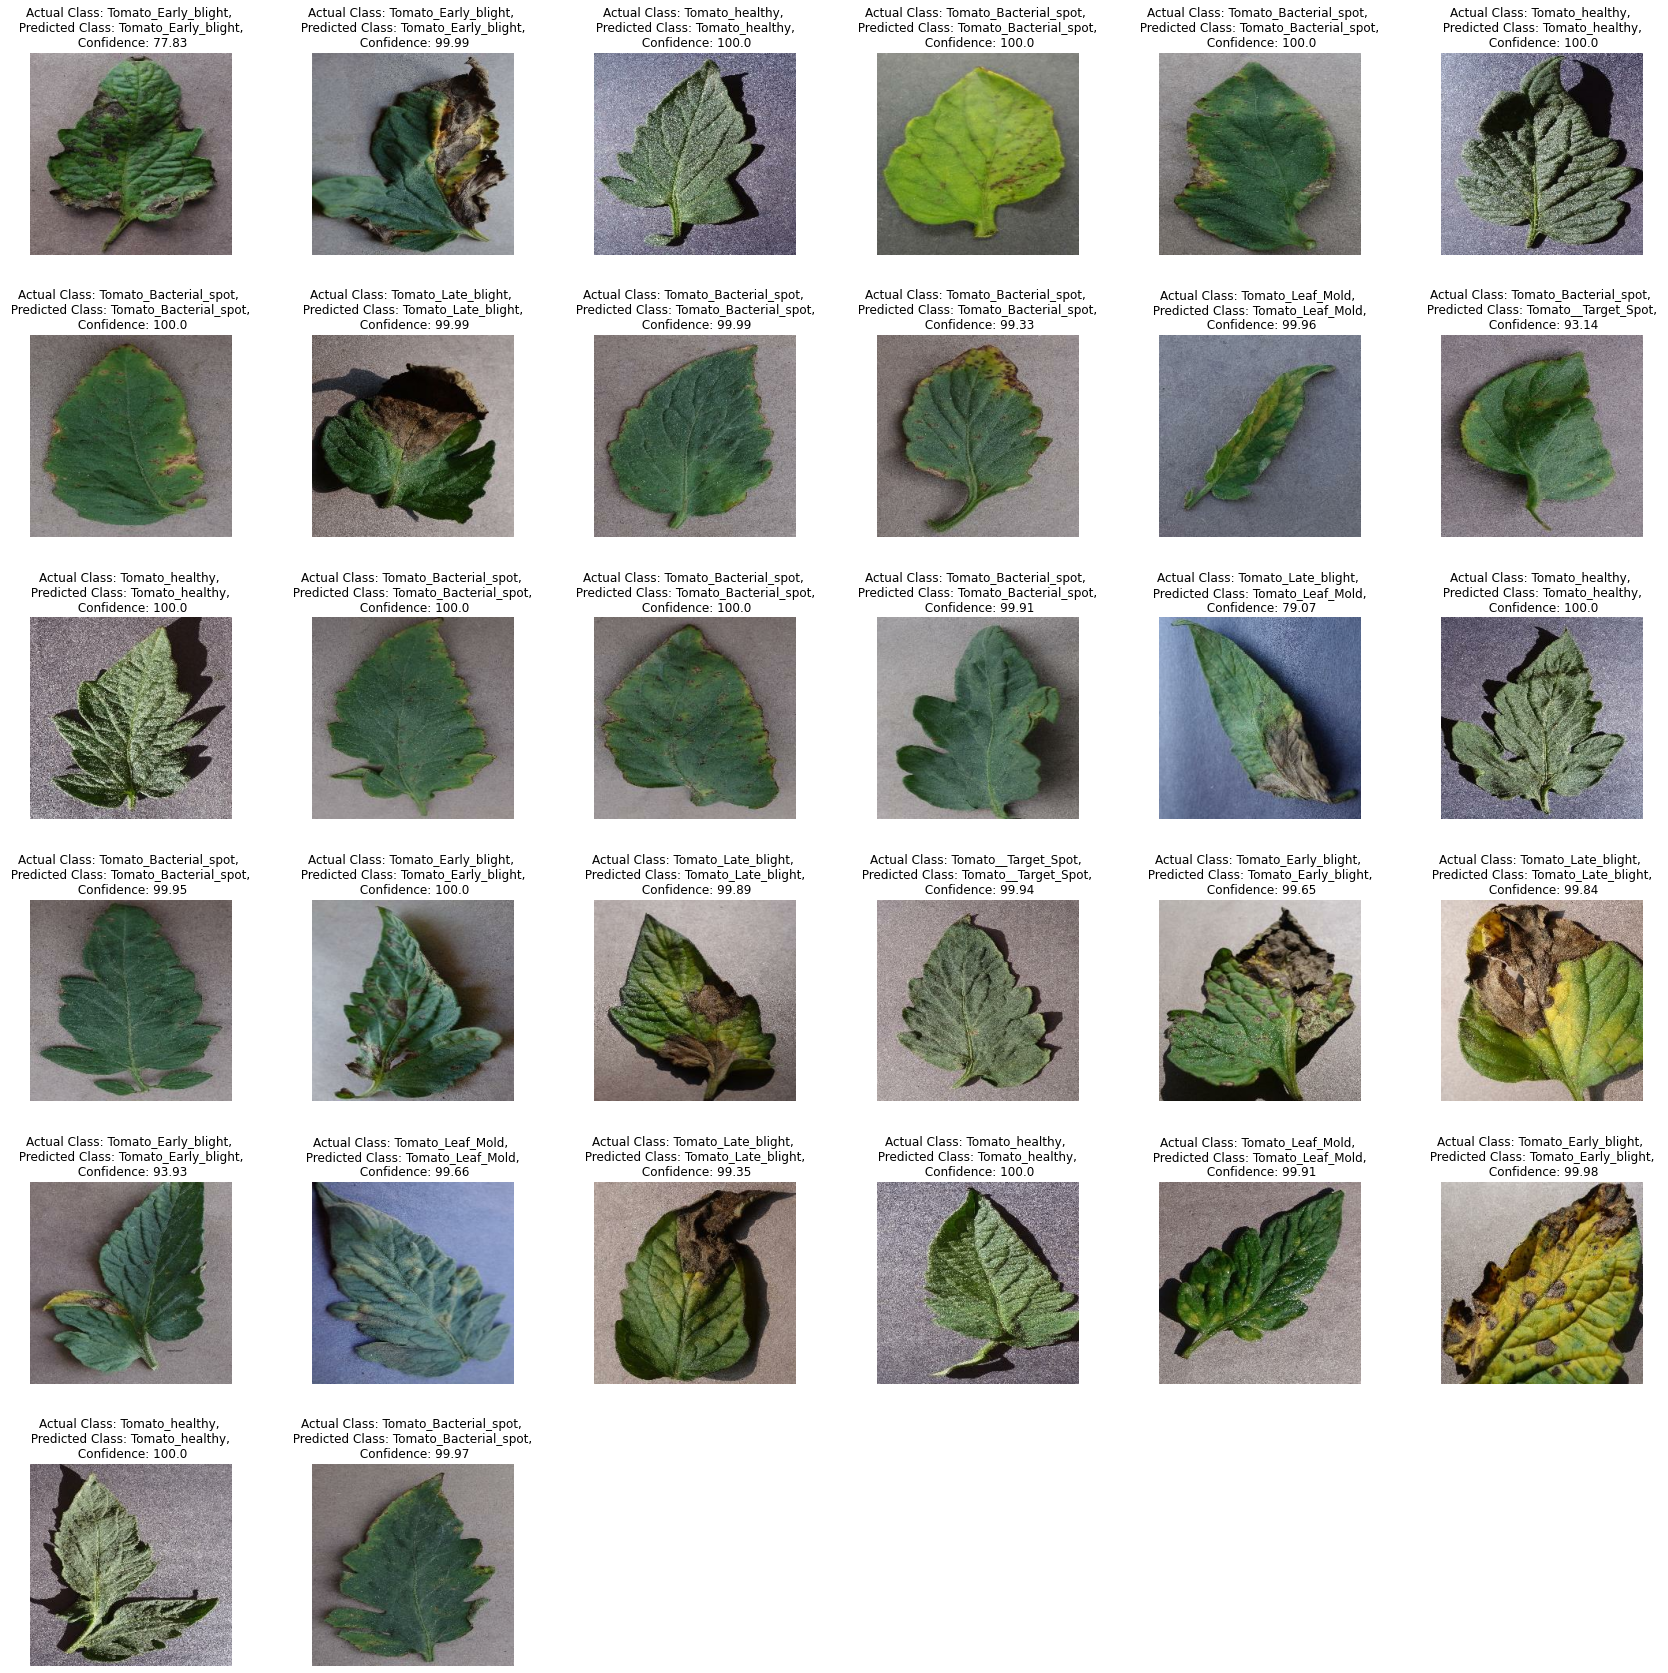

In [95]:
plt.figure(figsize=(28,28))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for images, labels in test_data.take(1):
        for i in range(32):
            subplt = plt.subplot(6,6,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            
            pred_class, confidence = predict(model, images[i].numpy())
            actual_class = class_names[labels[i]]
            
            plt.title(f"Actual Class: {actual_class}, \n Predicted Class: {pred_class}, \n Confidence: {confidence}")
            plt.axis('off')